In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


lego = pd.read_csv("/Users/rebeccaswedberg/Downloads/game_data/lego.csv")

# Determine the optimal price at which they should sell Lego products based on the number of Lego pieces in the Lego set and the age of customer that the product is most likely to be purchased by 30- year olds

In [2]:
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
ages                 12261 non-null int64
list_price           12261 non-null float64
num_reviews          12261 non-null int64
piece_count          12261 non-null int64
play_star_rating     12261 non-null float64
review_difficulty    12261 non-null int64
country              12261 non-null int64
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [3]:
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


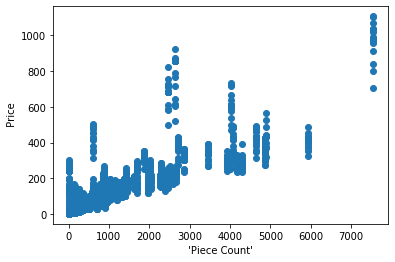

In [7]:
y=lego['list_price']
x=lego['piece_count']
plt.xlabel("'Piece Count'")
plt.ylabel(" Price")
plt.scatter(x,y)

In [8]:
f='y ~x'
test=ols(f,data=lego).fit()

In [9]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 3.804e+04
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:44:26   Log-Likelihood:                -64182.
No. Observations:               12261   AIC:                         1.284e+05
Df Residuals:                   12259   BIC:                         1.284e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.3243      0.478     36.256      0.000      16.388      18.261
x              0.0969      0.000    195.027      0.000       0.096       0.098
==============================================================================
Omnibus:                    13987.172   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2037748.322
Skew:                           5.819   Prob(JB):                         0.00
Kurtosis:                      65.075   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  
# Extract the standard errors.
print("Standard errors: ", test.bse)  
# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    17.324325
x             0.096913
dtype: float64
Standard errors:  Intercept    0.477827
x            0.000497
dtype: float64
Predicted values:  [44.16935263 33.6057859  24.49592101 ... 39.90516056 21.97617115
 27.88789198]


In [11]:
y_pred = 0.0969 * lego['piece_count'] - 17.3243

y_pred

0         9.5170
1        -1.0451
2       -10.1537
3        82.6765
4        54.7693
          ...   
12256    15.7186
12257     3.7030
12258     5.2534
12259   -12.6731
12260    -6.7622
Name: piece_count, Length: 12261, dtype: float64

Text(0, 0.5, ' Price')

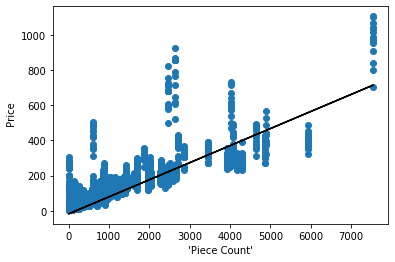

In [13]:
plt.scatter(x,y)
plt.plot(x,y_pred, color='black') 
plt.xlabel("'Piece Count'")
plt.ylabel(" Price")

What the price should be for 8,000 pieces of Lego

In [15]:
price_8k =  0.0969 * 8000 - 17.3243

price_8k

757.8757

What the price should be for 8,000 pieces of Lego and purchased by 30-year olds

In [21]:
age30= lego.loc[(lego['ages']==30)]
age30

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
735,30,99.9900,28,370,4.6,2,20
737,30,89.9900,5,1020,3.8,0,20
740,30,49.9900,1,513,5.0,2,20
743,30,29.9900,57,10,4.6,2,20
755,30,59.9900,16,494,4.5,0,20
...,...,...,...,...,...,...,...
11666,30,49.2971,57,10,4.6,2,18
12206,30,109.7878,28,370,4.6,2,19
12208,30,91.4878,5,1020,3.8,0,19
12211,30,54.8878,1,513,5.0,2,19


In [24]:
age30.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,30.0,70.528987,21.771739,471.554348,4.497826,1.369565,10.130435
std,0.0,25.816202,21.693724,350.073473,0.424258,0.934296,6.354400
min,30.0,29.990000,1.000000,10.000000,3.800000,0.000000,0.000000
25%,30.0,48.787800,5.000000,342.500000,4.400000,0.000000,4.000000
50%,30.0,54.887800,12.000000,425.500000,4.600000,2.000000,10.000000
75%,30.0,96.163500,28.000000,513.000000,4.625000,2.000000,16.000000
max,30.0,116.870000,57.000000,1020.000000,5.000000,2.000000,20.000000


In [28]:
# Average price per lego piece 30-year olds pay 
70.52/471.55

0.14954935849856854

In [29]:
#Price for 8,000 pieces 30-year olds would pay 
0.14*8000

1120.0